In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import os
import sys
df1 = pd.read_csv('starttime_20190819214320.log.txt', sep=',', header=None, 
                  names=["framework", "jvmversion", "startuptime"])
# set width of bar
barWidth = 0.5

In [2]:
framework_dict={'hse':'Helidon SE','mn':'Micronaut','none':'No framework','mp':'Microprofile','sb':'Spring Boot','sbreactive':'WebFlux','sbfu':'Spring Fu','vertx':'Vert.x','akka':'Akka','qs':'Quarkus'}
df1['framework'] = df1['framework'].map(framework_dict)
df1 = df1[df1.jvmversion != 'svm']
df1=df1.groupby(['framework']).agg({'startuptime':['mean','std']})
df1=df1.startuptime.reset_index()

In [3]:
df1=df1.sort_values(['mean'], ascending=[True])

In [4]:
ind = np.arange(len(df1.framework.unique()))

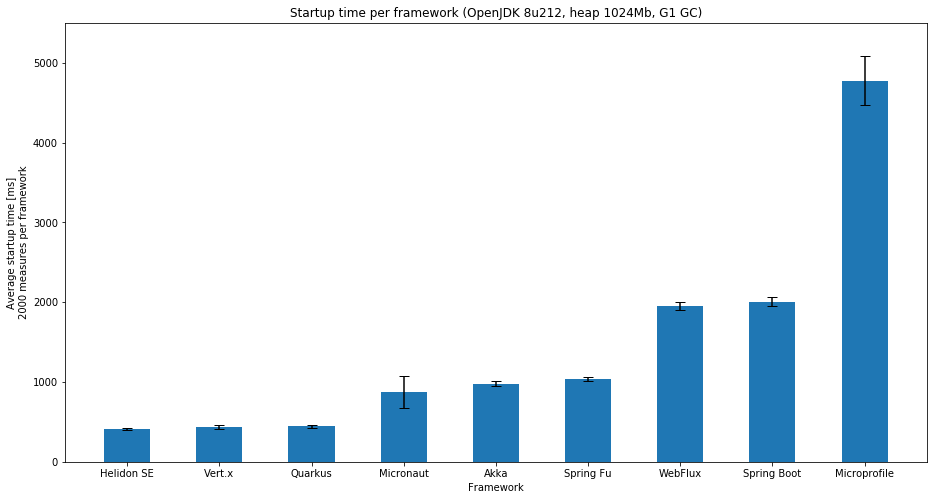

In [5]:
plt.xlabel('Framework')
plt.ylabel('Average startup time [ms]\n2000 measures per framework')
plt.xticks(ind, df1['framework'])
plt.title('Startup time per framework (OpenJDK 8u212, heap 1024Mb, G1 GC)')
plt.tight_layout()
plt.ylim(0, 5500)
plt.bar(ind, df1['mean'], barWidth, yerr=df1['std'],capsize=5)
fig=plt.gcf()
fig.set_size_inches(16,8)

In [6]:
df1

,framework,mean,std
1,Helidon SE,413.3675,12.870364
7,Vert.x,434.7375,27.429706
4,Quarkus,444.9165,20.983605
2,Micronaut,876.3175,205.341996
0,Akka,977.3815,29.424851
6,Spring Fu,1038.3205,27.223415
8,WebFlux,1948.9300,51.901898
5,Spring Boot,2009.2115,60.236243
3,Microprofile,4777.2035,306.973684


In [7]:
fig.savefig('output.png' ,dpi=100,bbox_inches = 'tight')
plt.close('all')